In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/boston/listings.csv
/kaggle/input/boston/reviews.csv
/kaggle/input/boston/calendar.csv


# Reading the data

## We wish to predict house prices using the listings data. The reason for this is centered around the home owner's perspective who wishes to host people in his house. He might wish to know a few things about the market before commiting to a certain price for his home. Of the things he should know, the following will be addressed here:

- ## How deciding is he location of the property in the price the owner should demand
- ## What characteristics of the home itself are important on deciding this price and how important are they?
- ## Is it possible to predict the adequate listing price for the property and, if so, with how much accuracy?

## These questions are important because an undervalued property could attract clients but not be able to pay for its expenses while and overvalued property could have the opposite bad effects


## To begin, we must carefully select and transform the variables that we'll use. Let's load the dataset first

In [2]:
listings = pd.read_csv(
    #'/kaggle/input/boston/listings.csv',
    'listings.csv',
    index_col = 0,
    parse_dates = ['last_scraped'],
    na_values = 'NaN'
)

In [3]:
listings.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


# Numerical Variables

## Let's select the numerical variables so we can transform them. As we will see, the way some numerical variables are written in the dataframe makes pandas believe they are text so we'll have to do something about that which will come later when we analyze categorical variables

In [4]:
num_vals = listings.select_dtypes(include = ['float','int']).columns

num_vals_df = listings[num_vals]
num_vals_df.head()

,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,20160906204935,31303940,1,1,NaN,42.282619,-71.133068,4,1.5,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3075044,20160906204935,2572247,1,1,NaN,42.286241,-71.134374,2,1.0,1.0,...,10.0,9.0,10.0,10.0,9.0,9.0,NaN,NaN,1,1.30
6976,20160906204935,16701,1,1,NaN,42.292438,-71.135765,2,1.0,1.0,...,10.0,9.0,10.0,10.0,9.0,10.0,NaN,NaN,1,0.47
1436513,20160906204935,6031442,1,1,NaN,42.281106,-71.121021,4,1.0,1.0,...,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,1,1.00
7651065,20160906204935,15396970,1,1,NaN,42.284512,-71.136258,2,1.5,1.0,...,10.0,10.0,10.0,10.0,9.0,10.0,NaN,NaN,1,2.25


## From this we can see that there exist some variables such as 'license' or 'jurisdiction_names' that appear to be wholly incomplete, let's see if that is the case by counting the missing values in each column

In [5]:
num_vals_df.isnull().mean(axis = 0).sort_values(ascending = False)

has_availability                  1.000000
jurisdiction_names                1.000000
license                           1.000000
neighbourhood_group_cleansed      1.000000
square_feet                       0.984379
review_scores_accuracy            0.229568
review_scores_location            0.229289
review_scores_value               0.229010
review_scores_checkin             0.228731
review_scores_communication       0.228173
review_scores_cleanliness         0.228173
review_scores_rating              0.226778
reviews_per_month                 0.210879
bathrooms                         0.003905
bedrooms                          0.002789
beds                              0.002510
host_id                           0.000000
host_listings_count               0.000000
host_total_listings_count         0.000000
number_of_reviews                 0.000000
latitude                          0.000000
longitude                         0.000000
accommodates                      0.000000
availabilit

##  There are 4 completely empty columns and 1 that might as well be. We'll remove these columns as well as the 'scrape_id' and 'host_id' as we can't expect them to have any meaningful relation with the listing price

In [6]:
num_vals_df.drop(
    [# Drop the columns with high percentage of missing values
     'has_availability',
     'jurisdiction_names',
     'license',
     'neighbourhood_group_cleansed',
     'square_feet',
     # Drop useless columns
     'scrape_id',
     'host_id'], 
    inplace = True,
    axis = 1)

num_vals_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,1,1,42.282619,-71.133068,4,1.5,2.0,3.0,1,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3075044,1,1,42.286241,-71.134374,2,1.0,1.0,1.0,0,2,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30
6976,1,1,42.292438,-71.135765,2,1.0,1.0,1.0,1,3,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,1,0.47
1436513,1,1,42.281106,-71.121021,4,1.0,1.0,2.0,2,1,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00
7651065,1,1,42.284512,-71.136258,2,1.5,1.0,2.0,1,2,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.25


## Another step that we must make is to remove highly correlated columns. The following correlation matrix helps us determine which columns we must remove

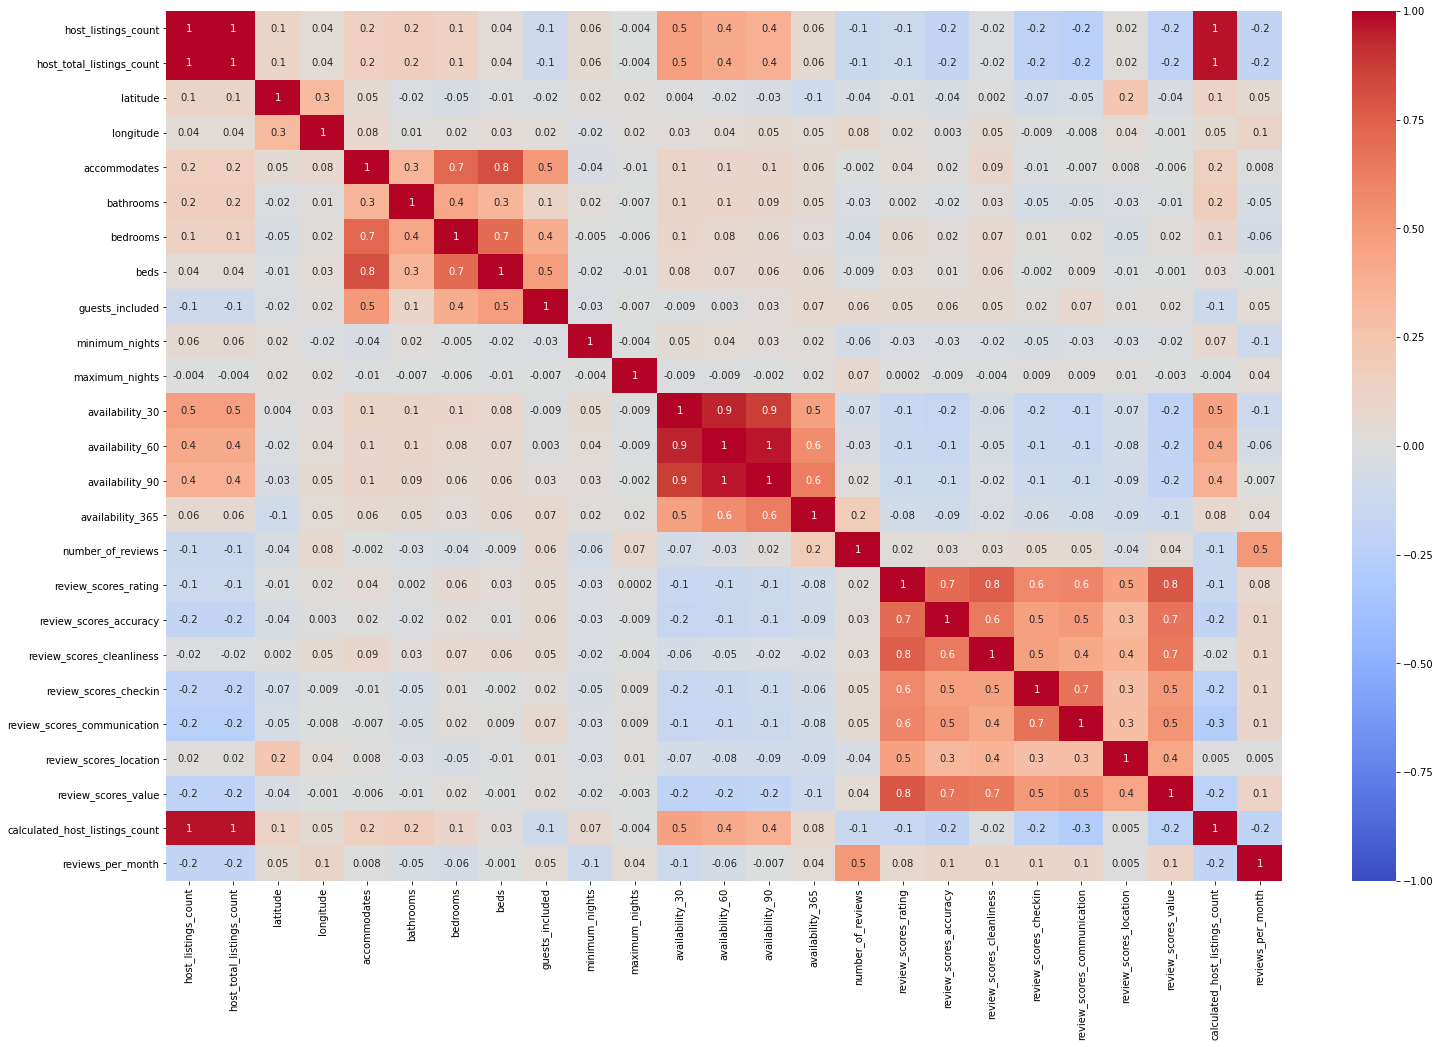

In [7]:
a4_dims = (25,16)

fig, ax = plt.subplots(figsize = a4_dims)

sns.heatmap(
    ax = ax,
    data = num_vals_df.corr(),
    annot = True,
    fmt='.1g',
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = 'coolwarm');

## As we can see, the column 'host_listings_count', is equal to the column 'host_total_listings_count' and the columns 'availability_30' and 'availability_90' are highly correlated to the column 'availability_60'.

In [8]:
num_vals_df.drop(
    [# Drop highly correlated/identical columns
     'host_listings_count',
     'availability_30',
     'availability_90'], 
    inplace = True,
    axis = 1)

num_vals_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,1,42.282619,-71.133068,4,1.5,2.0,3.0,1,2,1125,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
3075044,1,42.286241,-71.134374,2,1.0,1.0,1.0,0,2,15,...,36,94.0,10.0,9.0,10.0,10.0,9.0,9.0,1,1.30
6976,1,42.292438,-71.135765,2,1.0,1.0,1.0,1,3,45,...,41,98.0,10.0,9.0,10.0,10.0,9.0,10.0,1,0.47
1436513,1,42.281106,-71.121021,4,1.0,1.0,2.0,2,1,1125,...,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.00
7651065,1,42.284512,-71.136258,2,1.5,1.0,2.0,1,2,31,...,29,99.0,10.0,10.0,10.0,10.0,9.0,10.0,1,2.25


## The missing values of all these columns are imputed using the mean

In [9]:
for col in num_vals_df:
    num_vals_df[col].fillna((num_vals_df[col].mean()), inplace=True)
    
num_vals_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,1,42.282619,-71.133068,4,1.5,2.0,3.0,1,2,1125,...,0,91.916667,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,1,1.970908
3075044,1,42.286241,-71.134374,2,1.0,1.0,1.0,0,2,15,...,36,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1,1.300000
6976,1,42.292438,-71.135765,2,1.0,1.0,1.0,1,3,45,...,41,98.000000,10.000000,9.000000,10.000000,10.000000,9.000000,10.000000,1,0.470000
1436513,1,42.281106,-71.121021,4,1.0,1.0,2.0,2,1,1125,...,1,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1,1.000000
7651065,1,42.284512,-71.136258,2,1.5,1.0,2.0,1,2,31,...,29,99.000000,10.000000,10.000000,10.000000,10.000000,9.000000,10.000000,1,2.250000


# Categorical Variables

## We can now analyze the categorical columns. We begin by selecting all columns with the data type 'object'

In [10]:
# Dummy the categorical variables
cat_vals = listings.select_dtypes(include = ['object']).copy().columns

cat_vals_df = listings[cat_vals]
cat_vals_df.head()

,listing_url,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
3075044,https://www.airbnb.com/rooms/3075044,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
6976,https://www.airbnb.com/rooms/6976,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,"PUBLIC TRANSPORTATION: From the house, quick p...","I am living in the apartment during your stay,...",...,$20.00,5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
1436513,https://www.airbnb.com/rooms/1436513,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,There are buses that stop right in front of th...,The basement has a washer dryer and gym area. ...,...,$25.00,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
7651065,https://www.airbnb.com/rooms/7651065,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,From Logan Airport and South Station you have...,You will have access to the front and side por...,...,$0.00,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f


## We can see the following interesting things:
 
## * Columns such as 'name', 'summary', 'space', etc. are long and complicated sentences which, for the sake of keeping the model simple without including NLP, must be removed.
## * Naturally numerical columns such as 'extra_people', 'price', 'calendar_updated' and others which can be converted to numeric can/should be modified in order to keep the original meaning of these variables and also to avoid the number of features exploding when these variables are dummy encoded.
## * Just as in the case of the numerical variables, there may be columns with a high percentage of missing values or with just 1 level per column. The column 'experiences_offered' and 'market' may be some of these

In [11]:
cat_vals_df.drop(
    [# Drop Natural Language and text columns
     'notes',
     'interaction',
     'access',
     'neighborhood_overview',
     'host_about',
     'transit',
     'house_rules',
     'space',
     'medium_url',
     'thumbnail_url',
     'xl_picture_url',
     'summary',
     'host_url',
     'host_name',
     'picture_url',
     'description',
     'name',
     'host_thumbnail_url',
     'amenities', # This one is interesting as it could be transformed into several other variables such as quantity of amenities, or dummy variables for each amenity
     'host_verifications', # Same as amenities
     'host_picture_url',
     'listing_url'
    ], 
    inplace = True,
    axis = 1)

cat_vals_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,
12147973,none,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,t,f,...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
3075044,none,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,t,t,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
6976,none,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,t,t,...,$20.00,5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
1436513,none,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,t,f,...,$25.00,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
7651065,none,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,t,t,...,$0.00,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f


## Although missing values can be encoded as a category of their own, we prefer to eliminate columns with high percentage of them due to the fact that we don't know what caused them on each case.

In [12]:
cat_vals_mv = cat_vals_df.isnull().mean(axis = 0).sort_values(ascending = False)

cat_vals_mv[1:,]

weekly_price                        0.751185
security_deposit                    0.625662
cleaning_fee                        0.308787
last_review                         0.210879
first_review                        0.210879
neighbourhood                       0.151464
host_response_time                  0.131381
host_response_rate                  0.131381
host_acceptance_rate                0.131381
host_neighbourhood                  0.094561
zipcode                             0.010600
market                              0.003905
host_location                       0.003068
property_type                       0.000837
city                                0.000558
state                               0.000000
host_is_superhost                   0.000000
host_has_profile_pic                0.000000
host_identity_verified              0.000000
street                              0.000000
host_since                          0.000000
neighbourhood_cleansed              0.000000
require_gu

In [13]:
cat_vals_df.drop(
    [# Drop columns with high percentage of missing values
     'weekly_price',
     'security_deposit'
    ], 
    inplace = True,
    axis = 1)

cat_vals_df.head()

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,experiences_offered,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,...,extra_people,calendar_updated,calendar_last_scraped,first_review,last_review,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
id,,,,,,,,,,,,,,,,,,,,,
12147973,none,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,t,f,...,$0.00,2 weeks ago,2016-09-06,NaN,NaN,f,f,moderate,f,f
3075044,none,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,t,t,...,$0.00,a week ago,2016-09-06,2014-06-01,2016-08-13,f,t,moderate,f,f
6976,none,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,t,t,...,$20.00,5 days ago,2016-09-06,2009-07-19,2016-08-05,f,f,moderate,t,f
1436513,none,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,t,f,...,$25.00,a week ago,2016-09-06,2016-08-28,2016-08-28,f,f,moderate,f,f
7651065,none,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,t,t,...,$0.00,2 weeks ago,2016-09-06,2015-08-18,2016-09-01,f,f,flexible,f,f


## From the cat_vals_df dataframe we have the following types of variables. We won't use the dates due to time constraints but they could be parsed and used to create variables such as time_since_first_review, etc

In [14]:
# Numeric Variables 

num_vals_list = [
    'cleaning_fee',
    'host_acceptance_rate',
    'host_response_rate',
    'extra_people',
    'price']

# Dates 

dates_list = [
    'last_review',
    'first_review',
    'host_since',
    'calendar_last_scraped']


# Categorical
cat_vals_list = [
    'neighbourhood',
    'host_response_time',
    'host_neighbourhood',
    'zipcode',
    'market',
    'host_location',
    'property_type',
    'city',
    'experiences_offered',
    'require_guest_phone_verification',
    'host_identity_verified',
    'host_is_superhost',
    'cancellation_policy',
    'instant_bookable',
    'requires_license',
    'calendar_updated',
    'bed_type',
    'room_type',
    'is_location_exact',
    'country',
    'country_code',
    'smart_location',
    'state',
    'neighbourhood_cleansed',
    'street',
    'require_guest_profile_picture',
    'host_has_profile_pic']

In [15]:
num_vals2_df = cat_vals_df[num_vals_list]

## We cast the numerical columns as such by removing special characters and choosing their data type as 'float'. Also, we romve any rows that do not have a price then we impute all columns with their mean

In [16]:
for column in num_vals2_df:
    num_vals2_df[column] = num_vals2_df[column].str.replace('$', '')
    num_vals2_df[column] = num_vals2_df[column].str.replace('%', '')
    num_vals2_df[column] = num_vals2_df[column].str.replace(',', '').astype(float)

num_vals2_df.dropna(subset = ["price"], inplace = True)
num_vals2_df.head()
    
for column in num_vals2_df:
    num_vals2_df[column].fillna((num_vals2_df[column].mean()), inplace = True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [17]:
num_vals2_df.head()

,cleaning_fee,host_acceptance_rate,host_response_rate,extra_people,price
id,,,,,
12147973,35.000000,84.173089,94.989082,0.0,250.0
3075044,10.000000,100.000000,100.000000,0.0,65.0
6976,68.380145,88.000000,100.000000,20.0,65.0
1436513,50.000000,50.000000,100.000000,25.0,75.0
7651065,15.000000,100.000000,100.000000,0.0,79.0


In [18]:
cat_vals_df = cat_vals_df[cat_vals_list]

## Now we see which true categorical columns have too many or two few levels and we remove them from the dataframe

In [19]:
cat_vals_df.nunique(axis = 0)

neighbourhood                         30
host_response_time                     4
host_neighbourhood                    53
zipcode                               43
market                                 4
host_location                        176
property_type                         13
city                                  38
experiences_offered                    1
require_guest_phone_verification       2
host_identity_verified                 2
host_is_superhost                      2
cancellation_policy                    4
instant_bookable                       2
requires_license                       1
calendar_updated                      38
bed_type                               5
room_type                              3
is_location_exact                      2
country                                1
country_code                           1
smart_location                        39
state                                  1
neighbourhood_cleansed                25
street          

In [20]:
cat_vals_df.drop(
    [# Drop the columns with only 1 level
     'experiences_offered',
     'requires_license',
     'country',
     'country_code',
     'state',
     # Drop the columns with too many levels
     'host_location',
     'street'
    ], 
    inplace = True,
    axis = 1)

cat_vals_df.head()

,neighbourhood,host_response_time,host_neighbourhood,zipcode,market,property_type,city,require_guest_phone_verification,host_identity_verified,host_is_superhost,cancellation_policy,instant_bookable,calendar_updated,bed_type,room_type,is_location_exact,smart_location,neighbourhood_cleansed,require_guest_profile_picture,host_has_profile_pic
id,,,,,,,,,,,,,,,,,,,,
12147973,Roslindale,NaN,Roslindale,02131,Boston,House,Boston,f,f,f,moderate,f,2 weeks ago,Real Bed,Entire home/apt,t,"Boston, MA",Roslindale,f,t
3075044,Roslindale,within an hour,Roslindale,02131,Boston,Apartment,Boston,f,t,f,moderate,t,a week ago,Real Bed,Private room,t,"Boston, MA",Roslindale,f,t
6976,Roslindale,within a few hours,Roslindale,02131,Boston,Apartment,Boston,f,t,t,moderate,f,5 days ago,Real Bed,Private room,t,"Boston, MA",Roslindale,t,t
1436513,NaN,within a few hours,NaN,NaN,Boston,House,Boston,f,f,f,moderate,f,a week ago,Real Bed,Private room,f,"Boston, MA",Roslindale,f,t
7651065,Roslindale,within an hour,Roslindale,02131,Boston,House,Boston,f,t,t,flexible,f,2 weeks ago,Real Bed,Private room,t,"Boston, MA",Roslindale,f,t


## The resulting variables are dummy encoded

In [21]:
dummy_vals_df = pd.get_dummies(cat_vals_df, dummy_na = False)

# Exploration

## Before training the model, we take a look at the distribution of prices in the dataset

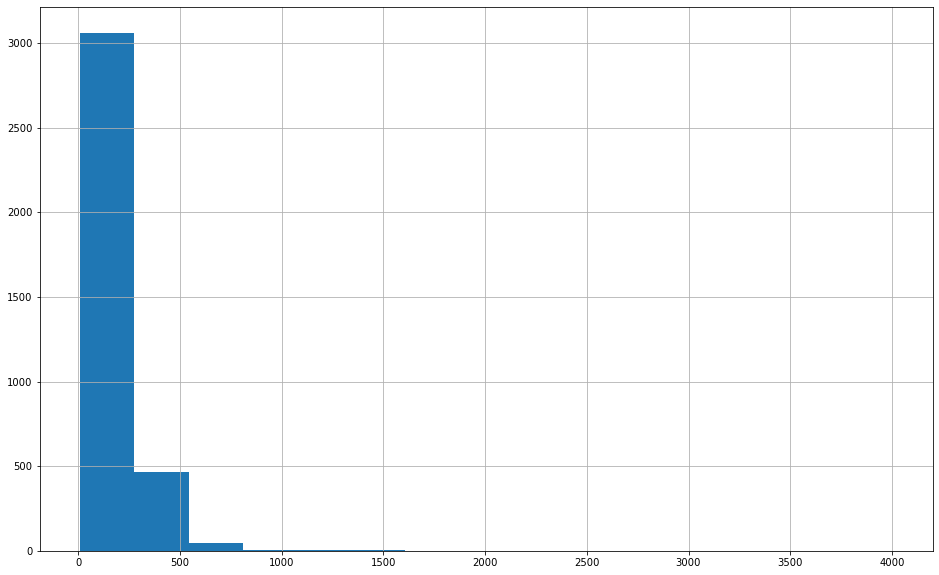

In [22]:
num_vals2_df['price'].hist(figsize = (16,10), bins = 15);

## We can see that it is a heavily skewed distribution with most of the values belonging in the 0-500 range. With such a distribution it is better to try to predict a transformation of the value rather than the value itself. Due to that we choose to predict the natural logarithm of the price

In [23]:
num_vals2_df['log_price'] = np.log(num_vals2_df['price'])

## As we can see the distribution of the logarithm of the price is more symmetric centered around ~5 which is better to predict

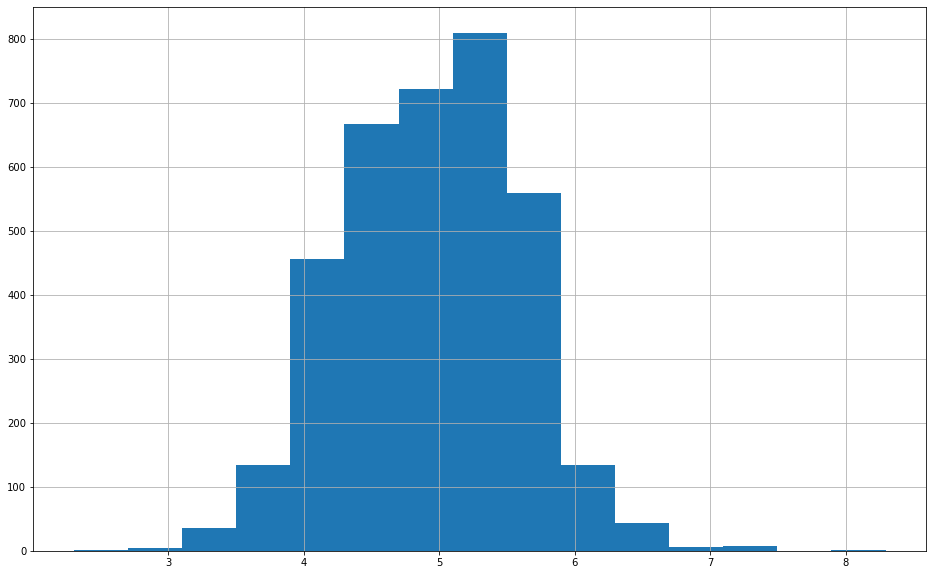

In [24]:
num_vals2_df['log_price'].hist(figsize = (16,10), bins = 15);

## Let's merge all dataframes we have (num_vals_df, num_vals2_df, cat_vals_df) to create the final dataframe for the model

In [25]:
model_base = pd.merge(
    num_vals_df, 
    num_vals2_df,
    how = 'left',
    left_index = True, 
    right_index = True)

model_base = pd.merge(
    model_base, 
    dummy_vals_df,
    how = 'left',
    left_index = True, 
    right_index = True)

In [26]:
model_base.dropna().shape

(3585, 341)

## Before moving to the modeling phase, let's create another dataframe without the dummy encoding of the categorical variables to see how some key features affect the price starting with the neighbourhood

In [27]:
model_base_2 = pd.merge(
    num_vals_df, 
    num_vals2_df,
    how = 'left',
    left_index = True, 
    right_index = True)

model_base_2 = pd.merge(
    model_base_2, 
    cat_vals_df,
    how = 'left',
    left_index = True, 
    right_index = True)

In [28]:
mean_prices_by_nb = model_base_2.groupby('host_neighbourhood')['price'].mean().sort_values()
std_dev_prices_by_nb = model_base_2.groupby('host_neighbourhood')['price'].std()

prices_by_nb = pd.merge(
    mean_prices_by_nb,
    std_dev_prices_by_nb,
    how = 'left',
    left_index = True, 
    right_index = True)

prices_by_nb.rename(columns = 
    {"price_x" : "price_mean",
     "price_y" : "price_stdev"},
    inplace = True
)

prices_by_nb.sort_values(by = 'price_mean', ascending = False).head(10)

,price_mean,price_stdev
host_neighbourhood,,
Bernal Heights,375.000000,NaN
Sunnyvale,365.000000,NaN
Chelsea,340.000000,367.695526
West End,298.841463,109.790088
Financial District,298.769231,111.600593
Downtown Crossing,271.303030,64.877522
Upper East Side,269.307692,48.750016
Back Bay,261.205128,143.645586
Government Center,250.000000,NaN


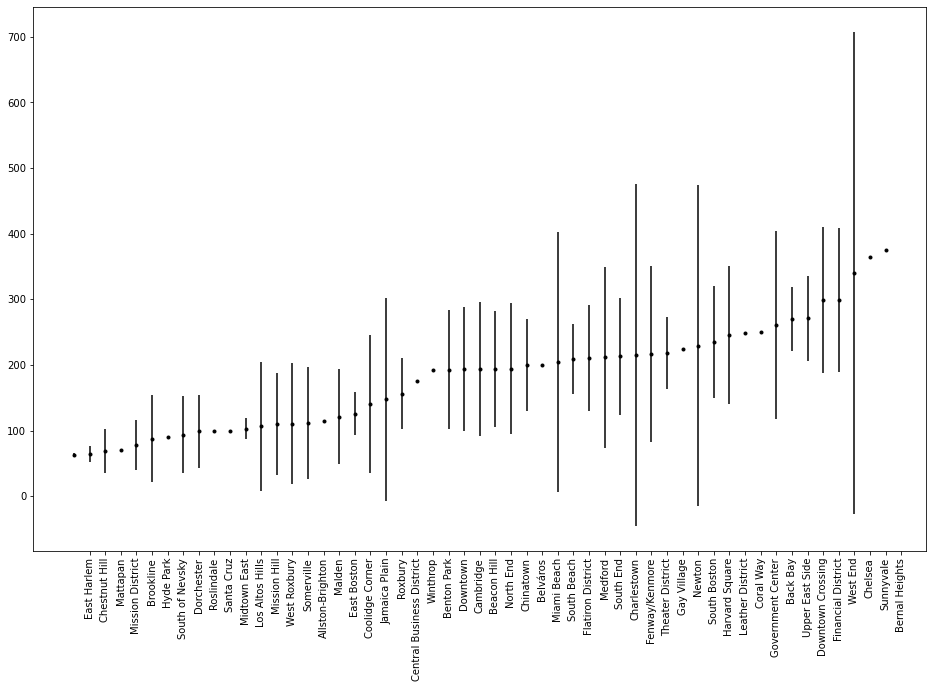

In [29]:
prices_by_nb['C'] = np.arange(len(prices_by_nb)) + 1

a4_dims = (16,10)

fig, ax = plt.subplots(figsize = a4_dims)

plt.xticks(
    prices_by_nb.C, 
    prices_by_nb.index, 
    rotation = 'vertical')

plt.errorbar(
    prices_by_nb.index,
    prices_by_nb.price_mean,
    yerr = prices_by_nb.price_stdev,
    fmt = '.k');

## The fact that the price of the property is so closely related to the neighbourhood should not be surprising, after all, a good neighbourhood has always been a deciding factor for home prices. There is strong variation which seems to increase with price.

## How do some numerical characteristics of the property affect the price? let's find out

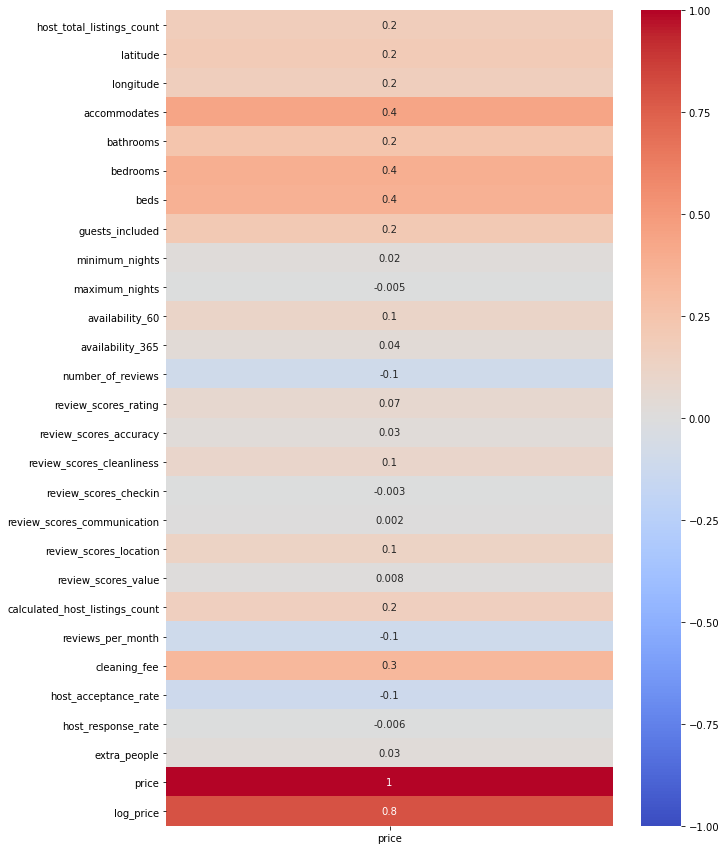

In [30]:
a4_dims = (10,15)

fig, ax = plt.subplots(figsize = a4_dims)

sns.heatmap(
    ax = ax,
    data = model_base_2.corr()[['price']],
    annot = True,
    fmt='.1g',
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = 'coolwarm');

## Clearly the number of rooms and size of accommodation plays a big role in the price. Surprisingly, the number of reviews seems to have a negative effect on the price of the property. It remains to be seen how strong that effect will be after modelig

# Modeling and Results

## The response is separated from the predictor variables

In [31]:
y = model_base[['log_price']]
X = model_base.drop(['log_price','price'], axis = 1)

## We use the linear regression model from sklearn to train

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42) 

lm_model = LinearRegression() # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)

#Rsquared and y_test
rsquared_score = r2_score(y_test, y_test_preds)
length_y_test = len(y_test)

"The r-squared score for your model was {} on {} values.".format(rsquared_score, length_y_test)

'The r-squared score for your model was 0.6625936180652302 on 717 values.'

## As we can see the R2 is good, obviously it could be better with better algorithms. Let's arrange the predictions of the test set to see how good they are

In [33]:
test_results = np.append(y_test_preds, np.array(y_test), axis = 1)
test_results_df = pd.DataFrame(test_results, columns = ['y_preds', 'y'])

In [34]:
test_results_df.head()

,y_preds,y
0,5.226124,5.075174
1,4.971283,4.905275
2,6.029332,6.263398
3,4.904826,4.736198
4,3.974659,4.007333


## The following graph shows the errors (y - y_pred) for each observation. We see most errors are in the range (-1, 1) with a few outliers around 3. These outliers belong to those high prices that made the price distribution so heavily skewed

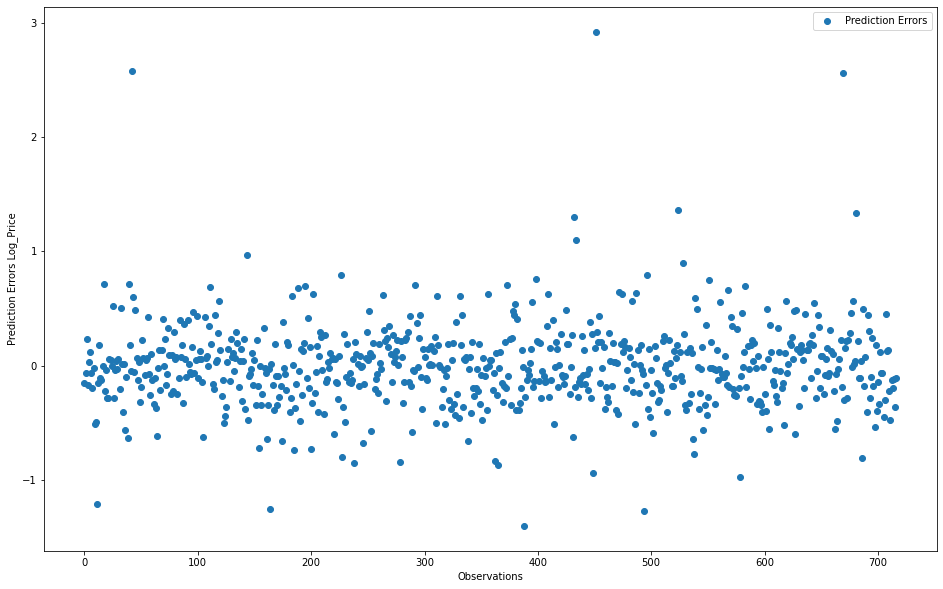

In [35]:
a4_dims = (16, 10)

fig, ax = plt.subplots(figsize = a4_dims)

ax.set(xlabel = 'Observations', ylabel = 'Prediction Errors Log_Price')

plt.plot(test_results_df.y - test_results_df.y_preds, label = 'Prediction Errors', marker='o', linestyle='')
plt.legend()
plt.show()

## A plot of the predictions vs actual values shows something similar; the model severely underestimates those outliers causing a general decrease in its R2

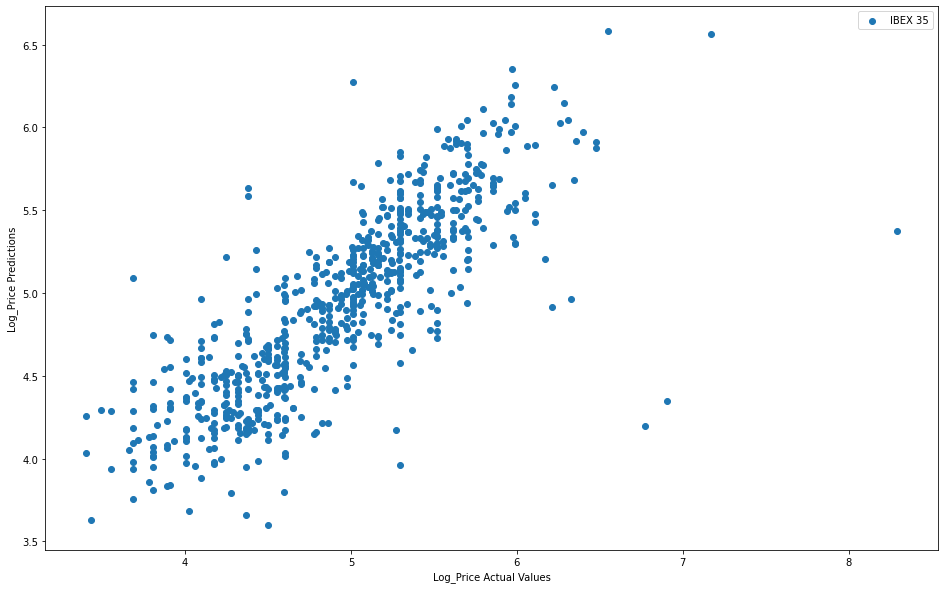

In [36]:
a4_dims = (16, 10)

fig, ax = plt.subplots(figsize = a4_dims)

ax.set(xlabel = 'Log_Price Actual Values', ylabel = 'Log_Price Predictions')

plt.scatter(test_results_df.y, test_results_df.y_preds, label = 'IBEX 35')
plt.legend()
plt.show()


## Despite it's shortcomings, the model is adequate to predict log_prices. Now we can analyze the effect that each variable has on the prediction

In [37]:
model_coef = np.append(
    np.array(X.columns).reshape(-1, 1),
    np.array(lm_model.coef_).reshape(-1, 1),
    axis = 1
)

model_coef.shape

(339, 2)

## Let's see the 10 most impactful variables according to the absolute value of their regression coefficient

In [38]:
model_coef_df = pd.DataFrame(model_coef, columns = ['variable', 'value'])
model_coef_df['abs_value'] = model_coef_df['value'].apply(lambda x: np.abs(x))
model_coef_df.sort_values(by = 'abs_value', ascending = False).iloc[0:10]

,variable,value,abs_value
1,latitude,4.38574,4.385742
2,longitude,1.35637,1.356371
147,zipcode_02169,-1.01354,1.013545
68,host_neighbourhood_Central Business District,-0.935871,0.935871
243,calendar_updated_30 months ago,0.935371,0.935371
63,host_neighbourhood_Belváros,-0.753458,0.753458
239,calendar_updated_25 months ago,0.73663,0.736630
230,calendar_updated_16 months ago,0.718132,0.718132
143,zipcode_02142,0.564684,0.564684
154,zipcode_02467,-0.552463,0.552463


## The result is not so surprising; it says that 9 out the 10 most important variables have something to do with the location of the property with calendar_updated_30 months ago being the only one that doesn't.